<a href="https://colab.research.google.com/github/EndymionSleeping/1KB570-project/blob/main/matb_project_withPCA_phonons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init
Handling dependancied and importing datasets

In [1]:
from google.colab import output
output.enable_custom_widget_manager()


In [2]:
try:
    import google.colab  # type: ignore # noqa: F401
    %pip install git+https://github.com/hackingmaterials/matbench
except ImportError:
    print("not in Colab")

  Cloning https://github.com/hackingmaterials/matbench to /tmp/pip-req-build-cn32lxxw
  Running command git clone --filter=blob:none --quiet https://github.com/hackingmaterials/matbench /tmp/pip-req-build-cn32lxxw
  Resolved https://github.com/hackingmaterials/matbench to commit 936176db18ca4cd7b38cbd957c017a5bac770c6b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
from matbench.bench import MatbenchBenchmark
mb = MatbenchBenchmark(autoload=False)

2024-10-16 09:58:23 INFO     Initialized benchmark 'matbench_v0.1' with 13 tasks: 
['matbench_dielectric',
 'matbench_expt_gap',
 'matbench_expt_is_metal',
 'matbench_glass',
 'matbench_jdft2d',
 'matbench_log_gvrh',
 'matbench_log_kvrh',
 'matbench_mp_e_form',
 'matbench_mp_gap',
 'matbench_mp_is_metal',
 'matbench_perovskites',
 'matbench_phonons',
 'matbench_steels']


INFO:matbench:Initialized benchmark 'matbench_v0.1' with 13 tasks: 
['matbench_dielectric',
 'matbench_expt_gap',
 'matbench_expt_is_metal',
 'matbench_glass',
 'matbench_jdft2d',
 'matbench_log_gvrh',
 'matbench_log_kvrh',
 'matbench_mp_e_form',
 'matbench_mp_gap',
 'matbench_mp_is_metal',
 'matbench_perovskites',
 'matbench_phonons',
 'matbench_steels']


In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


# Get first task

In [5]:
for task in mb.tasks:
  if task.dataset_name == "matbench_phonons":
    print(task.dataset_name)
    break

mb.matbench_phonons.load()

for fold in task.folds:

      # Inputs are either chemical compositions as strings
      # or crystal structures as pymatgen.Structure objects.
      # Outputs are either floats (regression tasks) or bools (classification tasks)
      train_inputs, train_outputs = task.get_train_and_val_data(fold)

matbench_phonons
2024-10-16 09:58:28 INFO     Loading dataset 'matbench_phonons'...


INFO:matbench.task:Loading dataset 'matbench_phonons'...


2024-10-16 09:58:29 INFO     Dataset 'matbench_phonons loaded.


INFO:matbench.task:Dataset 'matbench_phonons loaded.


In [6]:
#from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

# Prepare the data

In [7]:
type(train_inputs)

pandas.core.series.Series

In [8]:
import pandas as pd

# Assuming you already have the extract_features function defined earlier
def extract_features(structure_data):
    lattice_params = structure_data.lattice.abc
    angles = structure_data.lattice.angles
    volume = structure_data.lattice.volume

    # Extract atomic coordinates and species
    atomic_coords = [site.frac_coords for site in structure_data.sites]
    atomic_species = [site.specie.Z for site in structure_data.sites]

    # Flatten atomic coordinates
    atomic_coords_flat = np.array(atomic_coords).flatten()

    # Ensure both atomic coordinates and species are of length 288
    max_length = 288
    atomic_coords_padded = np.zeros(max_length)
    atomic_species_padded = np.zeros(max_length)

    # Fill in with actual values up to their original lengths
    atomic_coords_padded[:len(atomic_coords_flat)] = atomic_coords_flat[:min(len(atomic_coords_flat), max_length)]
    atomic_species_padded[:len(atomic_species)] = atomic_species[:min(len(atomic_species), max_length)]

    # Concatenate features
    features = np.concatenate([lattice_params, angles, [volume], atomic_coords_padded, atomic_species_padded])

    return features

# Now, let's load the data from matbench_phonons and process train_inputs
for task in mb.tasks:
    if task.dataset_name == "matbench_phonons":
        print(task.dataset_name)
        break

mb.matbench_phonons.load()

# Assuming we are processing a single fold for demonstration purposes
for fold in task.folds:
    train_inputs, train_outputs = task.get_train_and_val_data(fold)

    # Extract features from each structure in train_inputs
    X = np.array([extract_features(structure) for structure in train_inputs])
    y = np.array(train_outputs)

    # Number of features extracted
    lattice_param_columns = ['lattice_a', 'lattice_b', 'lattice_c']
    angle_columns = ['angle_alpha', 'angle_beta', 'angle_gamma']
    volume_column = ['volume']
    atomic_coord_columns = [f'atomic_coord_{i}' for i in range(288)]
    atomic_species_columns = [f'atomic_species_{i}' for i in range(288)]

    # Combine all column names
    column_names = lattice_param_columns + angle_columns + volume_column + atomic_coord_columns + atomic_species_columns

    # Convert X to DataFrame
    X_df = pd.DataFrame(X, columns=column_names)

    # Display the first few rows of the DataFrame
print(X_df.head())


    # Continue with further processing if needed (scaling, modeling, etc.)


matbench_phonons
2024-10-16 09:58:29 INFO     Dataset matbench_phonons already loaded; not reloading dataset.


INFO:matbench.task:Dataset matbench_phonons already loaded; not reloading dataset.


   lattice_a  lattice_b  lattice_c  angle_alpha  angle_beta  angle_gamma  \
0   3.407727   3.407727   3.407727         60.0        60.0    60.000000   
1   4.301500   4.301500   5.270300         90.0        90.0   120.000002   
2   3.164181   3.164181   4.467331         90.0        90.0    90.000000   
3   3.200305   3.200257   5.298093         90.0        90.0   120.000499   
4   4.236071   4.236071   4.236071         60.0        60.0    60.000000   

      volume  atomic_coord_0  atomic_coord_1  atomic_coord_2  ...  \
0  27.982032        0.250000        0.250000        0.250000  ...   
1  84.451193        0.000000        0.000000        0.000000  ...   
2  44.727112        0.500000        0.500000        0.500000  ...   
3  46.992041        0.666669        0.333339        0.500274  ...   
4  53.749544        0.000000        0.000000        0.000000  ...   

   atomic_species_278  atomic_species_279  atomic_species_280  \
0                 0.0                 0.0                 0.0  

In [9]:
train_inputs[1]

<ipython-input-9-1c8cd56008e5>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_inputs[1]


Structure Summary
Lattice
    abc : 4.3015 4.301499762381023 5.2703
 angles : 90.0 90.0 120.00000182735626
 volume : 84.45119345190359
      A : 4.3015 0.0 0.0
      B : -2.15075 3.725208 0.0
      C : 0.0 0.0 5.2703
    pbc : True True True
PeriodicSite: Ba (0.0, 0.0, 0.0) [0.0, 0.0, 0.0]
PeriodicSite: Ga (2.151, 1.242, 2.858) [0.6666, 0.3333, 0.5423]
PeriodicSite: Si (0.0002151, 2.484, 2.401) [0.3334, 0.6667, 0.4555]
PeriodicSite: H (2.151, 1.242, 4.616) [0.6666, 0.3333, 0.8759]

In [10]:
train_outputs[0]

<ipython-input-10-e9e97d7e989a>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_outputs[0]


701.5857233477558

In [42]:
def extract_features(structure_data):
    lattice_params = structure_data.lattice.abc
    angles = structure_data.lattice.angles
    volume = structure_data.lattice.volume

    # Extract atomic coordinates and species
    atomic_coords = [site.frac_coords for site in structure_data.sites]
    atomic_species = [site.specie.Z for site in structure_data.sites]

    # Flatten atomic coordinates
    atomic_coords_flat = np.array(atomic_coords).flatten()

    # Ensure both atomic coordinates and species are of length 288
    max_length = 288
    atomic_coords_padded = np.zeros(max_length)
    atomic_species_padded = np.zeros(max_length)

    # Fill in with actual values up to their original lengths
    atomic_coords_padded[:len(atomic_coords_flat)] = atomic_coords_flat[:min(len(atomic_coords_flat), max_length)]
    atomic_species_padded[:len(atomic_species)] = atomic_species[:min(len(atomic_species), max_length)]

    # Concatenate features
    features = np.concatenate([lattice_params, angles, [volume], atomic_coords_padded, atomic_species_padded])

    return features



X = np.array([extract_features(structure) for structure in train_inputs])
y = np.array(train_outputs)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaler2 = StandardScaler()
y = scaler2.fit_transform(y.reshape(-1,1))
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled ,y, test_size=0.2, random_state=42)

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 2: Apply PCA to reduce the dimensionality of X
 # You can change the number of components to what you need
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on the validation set
y_pred = model.predict(X_val)

# Step 6: Evaluate the model's performance
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Optional: Display some predictions alongside actual values
print("First 5 predictions and actual values:")
print("Predicted: ", y_pred[:5])
print("Actual: ", y_val[:5])

Mean Squared Error (MSE): 8.36763557295948e+23
R² Score: -9.271026559443753e+23
First 5 predictions and actual values:
Predicted:  [[ 0.40779495]
 [ 1.45671463]
 [-0.08277512]
 [-0.46546555]
 [-0.60624313]]
Actual:  [[-0.07680642]
 [ 0.21335321]
 [-0.48737242]
 [ 0.78775083]
 [-0.70844642]]


In [17]:
import pandas as pd

# Number of features extracted
lattice_param_columns = ['lattice_a', 'lattice_b', 'lattice_c']
angle_columns = ['angle_alpha', 'angle_beta', 'angle_gamma']
volume_column = ['volume']
atomic_coord_columns = [f'atomic_coord_{i}' for i in range(288)]
atomic_species_columns = [f'atomic_species_{i}' for i in range(288)]

# Combine all column names
column_names = lattice_param_columns + angle_columns + volume_column + atomic_coord_columns + atomic_species_columns

# Convert X_train to DataFrame
X_train_df = pd.DataFrame(X_train, columns=column_names)

# Display the first few rows of the DataFrame
print(X_train_df.head())

   lattice_a  lattice_b  lattice_c  angle_alpha  angle_beta  angle_gamma  \
0   1.036405   0.698144   0.015965    -1.587334   -1.583252    -1.521393   
1   0.809013   0.496874  -0.506440     0.242371    0.277851     1.410556   
2  -0.594019  -0.339179   0.981832     0.242371    0.277851     0.208990   
3  -0.029815  -0.245596   0.274021    -0.499151    1.032097     0.197026   
4  -0.801583  -0.928709   1.582962     0.242371    0.277851     1.410556   

     volume  atomic_coord_0  atomic_coord_1  atomic_coord_2  ...  \
0 -0.157463        0.717451        0.560056        0.615051  ...   
1  0.363342       -0.200373        0.790988        1.092125  ...   
2  0.363757        1.354627       -0.957541        0.429146  ...   
3  0.176166       -0.118159       -0.240000        1.109506  ...   
4 -0.116203       -1.359392       -1.428419        1.466503  ...   

   atomic_species_278  atomic_species_279  atomic_species_280  \
0                 0.0                 0.0                 0.0   
1   

In [26]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

# Get explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Compute cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Determine how many PCs are needed to explain at least 80% or 90% of the variance
num_components_80 = np.argmax(cumulative_variance >= 0.80) + 1
num_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

print(f'Number of components to explain 80% of the variance: {num_components_80}')
print(f'Number of components to explain 90% of the variance: {num_components_90}')


Number of components to explain 80% of the variance: 15
Number of components to explain 90% of the variance: 27


In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 2: Apply PCA to reduce the dimensionality of X
pca = PCA(n_components=27)  # You can change the number of components to what you need
X_pca = pca.fit_transform(X_scaled)

# Step 3: Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on the validation set
y_pred = model.predict(X_val)

# Step 6: Evaluate the model's performance
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(mse)
print(f"R² Score: {r2}")

# Optional: Display some predictions alongside actual values
print("First 5 predictions and actual values:")
print("Predicted: ", y_pred[:5])
print("Actual: ", y_val[:5])

0.6001819877297215
R² Score: 0.3350208550282263
First 5 predictions and actual values:
Predicted:  [[ 0.26797284]
 [ 1.48577451]
 [-0.07246821]
 [-0.69805775]
 [-0.70572764]]
Actual:  [[-0.07680642]
 [ 0.21335321]
 [-0.48737242]
 [ 0.78775083]
 [-0.70844642]]


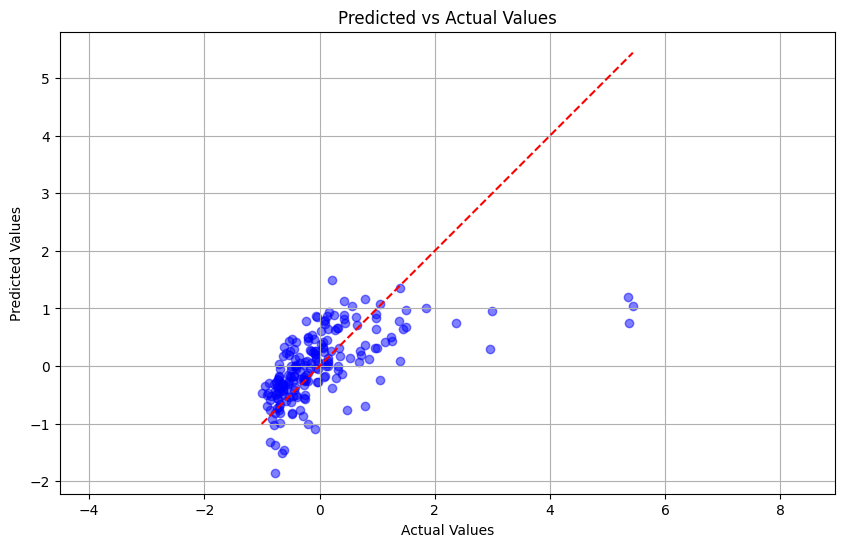

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.xlim(y_val.min() - 1, y_val.max() + 1)  # Adjust x limits for better visualization
plt.ylim(y_val.min() - 1, y_val.max() + 1)  # Adjust y limits for better visualization
plt.axis('equal')  # Set equal scaling
plt.show()

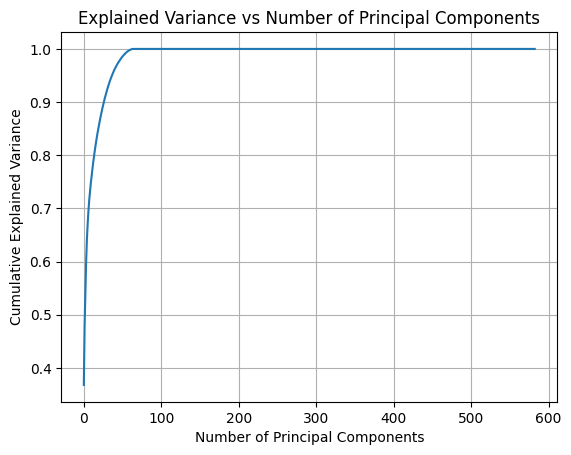

In [29]:
import matplotlib.pyplot as plt

# Plot cumulative explained variance
plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Principal Components')
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=num_components_90)

# Fit PCA on the training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Apply PCA transformation to the validation data
X_val_pca = pca.transform(X_val_scaled)

# The explained variance tells you how much variance is retained by each component
print(pca.explained_variance_ratio_)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the data (you have already done this)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Step 2: Apply PCA
pca = PCA(n_components=16)
X_reduced = pca.fit_transform(X_scaled)
pca_y = PCA(n_components=16)  # Set this to the number of components you want
y_reduced = pca.fit_transform(y_train)
# Step 3: Split the reduced data into train and validation sets
X_train_reduced, X_val_reduced, y_train, y_val = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train_reduced, y_train)

# Step 4: Make predictions on the validation set
y_pred = model.predict(X_val_reduced)

# Step 5: Evaluate the model performance
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Optional: Display some predictions alongside actual values
print("First 5 predictions and actual values:")
print("Predicted: ", y_pred[:5])
print("Actual: ", y_val[:5])

In [ ]:
X.shape

In [ ]:
y[0]

# ML

In [ ]:
def build_model(input_shape):
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', input_dim=583))#input_shape=(,7)))
    layers.Dropout(0.5),
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    #model.add(layers.Dense(1))  # Output layer for regression
    print(model.summary())
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

In [ ]:
# Build and train the Keras model
model = build_model(X_train.shape[1])


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Get test data and extract features
test_inputs = task.get_test_data(fold, include_target=False)
X_test = np.array([extract_features(structure) for structure in test_inputs])
X_test_scaled = scaler.transform(X_test)

# Predict on the testing data
predictions = model.predict(X_test_scaled)



train_loss = history.history["loss"][1:]
test_loss = history.history["val_loss"][1:]

In [ ]:
# Prepare and plot loss over time
plt.plot(train_loss,label="train")
plt.plot(test_loss,label="test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()